## Quantium’s retail analytics team task

import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

read transactionData into dataframe

In [2]:
df_trans = pd.read_excel("QVI_transaction_data.xlsx")

In [3]:
df_trans.shape

(264836, 8)

In [4]:
df_trans.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [5]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 15.2+ MB


We can first start by seeing that the DATE column is an int64 type, whereas the correct type for a date is datetime. We can correct this by inputting the follow code.

Using the code below, we define a function excel_integer_to_date that takes an Excel integer date as input and returns the corresponding date. Then, we use the apply() function to apply this conversion function to each element of the 'DATE' column in the transaction DataFrame

In [6]:
import datetime

# Define the Excel date system (either 1900 or 1904)
excel_date_system = 1900  # Change to 1904 if necessary

# Function to convert Excel integer date to date format
def excel_integer_to_date(integer_date):
    if excel_date_system == 1900:
        base_date = datetime.date(1899, 12, 30)
    elif excel_date_system == 1904:
        base_date = datetime.date(1904, 1, 1)
    else:
        raise ValueError("Unsupported Excel date system")

    return base_date + datetime.timedelta(days=integer_date)

# Apply the conversion function to the DataFrame column
df_trans['DATE'] = df_trans['DATE'].apply(excel_integer_to_date)

In [7]:
df_trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


the DATE column data type is now object, whereas the correct type for a date is datetime. We can correct this by inputting the follow code.

In [8]:
df_trans["DATE"] = pd.to_datetime(df_trans['DATE'])
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 15.2+ MB


data manipulation and regular expressions to clean the words.

In [9]:
import re

# Split product names into individual words
words = df_trans['PROD_NAME'].str.split()

# Flatten the list of words
words = [word for sublist in words for word in sublist]

# Remove words with digits and special characters
words = [word for word in words if not re.search(r'[0-9&]', word)]

# Create a pandas Series from the cleaned words list
word_series = pd.Series(words)

# Count the frequency of each word
word_counts = word_series.value_counts()

# Sort the words by frequency in descending order
sorted_words = word_counts.sort_values(ascending=False)

# Print the sorted words
print(sorted_words)

Chips        49770
Kettle       41288
Smiths       28860
Salt         27976
Cheese       27890
             ...  
Frch/Onin     1432
Pc            1431
NCC           1419
Garden        1419
Fries         1418
Length: 171, dtype: int64


Remove salsa products

In [10]:
# Check if 'PROD_NAME' contains the word 'salsa' (case-insensitive)
df_trans['SALSA'] = df_trans['PROD_NAME'].str.contains('salsa', case=False)

# Filter out rows with salsa products
df_trans = df_trans[~df_trans['SALSA']]

# Drop the 'SALSA' column
df_trans.drop(columns=['SALSA'], inplace=True)

# Print the resulting DataFrame with salsa products removed
df_trans["PROD_NAME"]

0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of  Lime 175g
264833                    Doritos Mexicana    170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 246742, dtype: object

In [11]:
# Check for null values
null_counts = df_trans.isnull().sum()
print("Null Value Counts:")
print(null_counts)

Null Value Counts:
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [12]:
# Summary statistics for numeric columns
numeric_summary = df_trans.describe()
print("Summary Statistics for Numeric Columns:")
numeric_summary

Summary Statistics for Numeric Columns:


,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [13]:
# Calculate the IQR (Interquartile Range)
Q1 = df_trans['PROD_QTY'].quantile(0.25)
Q3 = df_trans['PROD_QTY'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check for outliers
outliers = df_trans[(df_trans['PROD_QTY'] < lower_bound) | (df_trans['PROD_QTY'] > upper_bound)]

print("Outliers:")
outliers

Outliers:


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
...,...,...,...,...,...,...,...,...
264754,2018-10-07,268,268396,264841,8,Smiths Crinkle Cut Chips Original 170g,1,2.9
264755,2018-10-22,268,268463,264916,87,Infuzions BBQ Rib Prawn Crackers 110g,1,3.8
264756,2019-04-28,268,268491,264947,56,Cheezels Cheese Box 125g,1,2.1
264824,2019-03-13,272,272193,269906,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,1,4.6


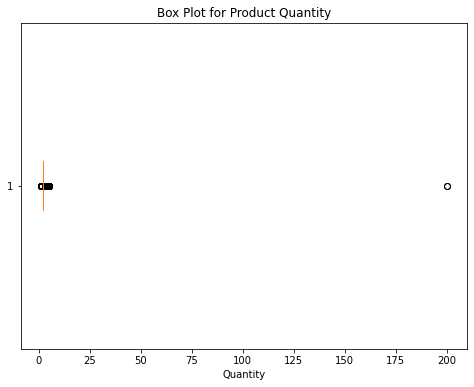

In [14]:
# Create a box plot for the 'PROD_QTY' column
plt.figure(figsize=(8, 6))
plt.boxplot(df_trans['PROD_QTY'], vert=False)  # vert=False for horizontal box plot
plt.xlabel('Quantity')
plt.title('Box Plot for Product Quantity')
plt.show()

 product quantity appears to have an outlier

In [15]:
# Calculate the IQR (Interquartile Range)
Q1 = df_trans['TOT_SALES'].quantile(0.25)
Q3 = df_trans['TOT_SALES'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check for outliers
outliers = df_trans[(df_trans['TOT_SALES'] < lower_bound) | (df_trans['TOT_SALES'] > upper_bound)]

print("Outliers:")
outliers

Outliers:


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
11,2018-08-20,8,8294,8221,114,Kettle Sensations Siracha Lime 150g,5,23.0
31,2019-05-15,43,43227,40186,26,Pringles Sweet&Spcy BBQ 134g,4,14.8
56,2019-05-16,74,74336,73182,84,GrnWves Plus Btroot & Chilli Jam 180g,5,15.5
...,...,...,...,...,...,...,...,...
258715,2018-08-16,194,194381,194835,102,Kettle Mozzarella Basil & Pesto 175g,4,21.6
258721,2018-08-15,200,200248,199694,3,Kettle Sensations Camembert & Fig 150g,4,18.4
258726,2018-08-20,203,203253,203360,28,Thins Potato Chips Hot & Spicy 175g,5,16.5
258729,2019-05-16,208,208205,207318,37,Smiths Thinly Swt Chli&S/Cream175G,5,15.0


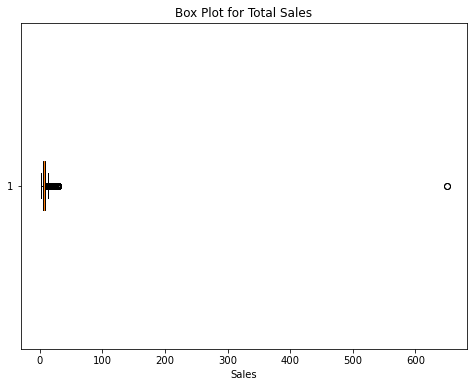

In [16]:
# Create a box plot for the 'TOT_SALES' column
plt.figure(figsize=(8, 6))
plt.boxplot(df_trans['TOT_SALES'], vert=False)  # vert=False for horizontal box plot
plt.xlabel('Sales')
plt.title('Box Plot for Total Sales')
plt.show()

In [17]:
# Filter rows where Quantity is equal to 200
rows_with_quantity_200 = df_trans[df_trans['PROD_QTY'] == 200]

# Print the rows where Quantity is 200
print("Rows with Quantity equal to 200:")
rows_with_quantity_200

Rows with Quantity equal to 200:


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [18]:
filtered_df = df_trans[df_trans['PROD_QTY'] == 200]

# Find the loyalty card numbers for customers with these transactions
loyalty_card_numbers_to_remove = filtered_df['LYLTY_CARD_NBR'].unique()

# Filter the dataset to remove transactions by these customers
df_trans= df_trans[~df_trans['LYLTY_CARD_NBR'].isin(loyalty_card_numbers_to_remove)]

df_trans.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2
10,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7


In [19]:
# Count the number of transactions by date
transaction_count_by_date = df_trans.groupby('DATE')['TXN_ID'].count().reset_index()
transaction_count_by_date.columns = ['Date', 'TransactionCount']

# Print the summary of transaction count by date
print("Transaction Count by Date:")
transaction_count_by_date

Transaction Count by Date:


,Date,TransactionCount
0,2018-07-01,663
1,2018-07-02,650
2,2018-07-03,674
3,2018-07-04,669
4,2018-07-05,660
...,...,...
359,2019-06-26,657
360,2019-06-27,669
361,2019-06-28,673
362,2019-06-29,703


In [20]:
# Create a sequence of dates from July 1, 2018, to June 30, 2019
start_date = pd.to_datetime('2018-07-01')
end_date = pd.to_datetime('2019-06-30')
date_range = pd.date_range(start_date, end_date)

# Merge the date sequence with your data to fill in missing dates
merged_data = pd.DataFrame({'DATE': date_range})
result = pd.merge(merged_data, df_trans, on='DATE', how='left')

# Count the number of transactions by date
transaction_count_by_date = result.groupby('DATE')['TXN_ID'].count().reset_index()
transaction_count_by_date.columns = ['Date', 'TransactionCount']

# Print the summary of transaction count by date
print("Transaction Count by Date:")
transaction_count_by_date

Transaction Count by Date:


,Date,TransactionCount
0,2018-07-01,663
1,2018-07-02,650
2,2018-07-03,674
3,2018-07-04,669
4,2018-07-05,660
...,...,...
360,2019-06-26,657
361,2019-06-27,669
362,2019-06-28,673
363,2019-06-29,703


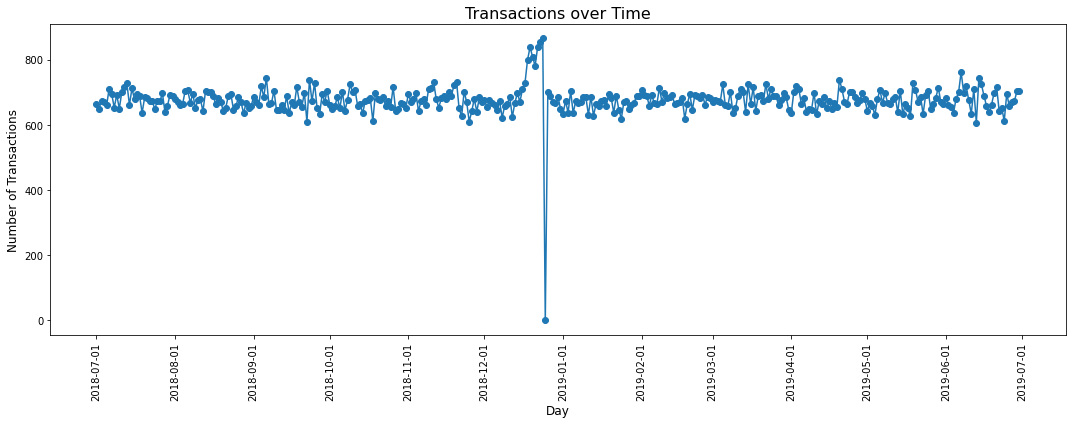

In [21]:
# Create the line plot
plt.figure(figsize=(15, 6))
plt.plot(transaction_count_by_date['Date'], transaction_count_by_date['TransactionCount'], marker='o', linestyle='-', markersize=6)

# Format the plot
plt.title("Transactions over Time", fontsize=16)
plt.xlabel("Day", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=1))

# Show the plot
plt.tight_layout()
plt.show()

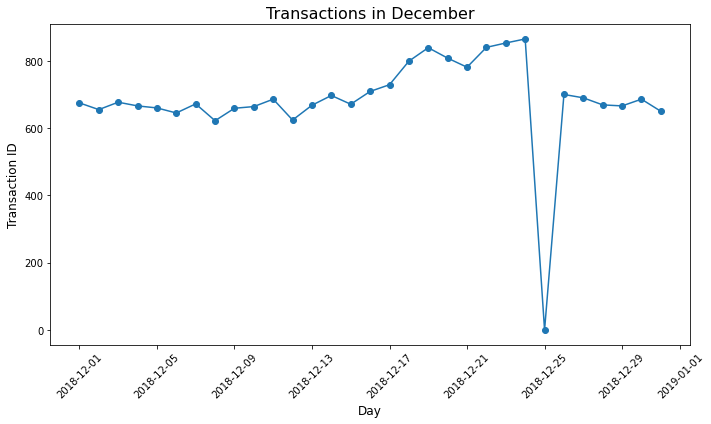

In [22]:
# Filter the data to include only dates in December
december_data = transaction_count_by_date[(transaction_count_by_date['Date'].dt.month == 12)]

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(december_data['Date'], december_data['TransactionCount'], marker='o', linestyle='-')

# Format the plot
plt.title("Transactions in December", fontsize=16)
plt.xlabel("Day", fontsize=12)
plt.ylabel("Transaction ID", fontsize=12)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [23]:
# Extract pack size using regular expression
df_trans['PACK_SIZE'] = df_trans['PROD_NAME'].str.extract('(\d+)g')

# Convert the 'PACK_SIZE' column to numeric
df_trans['PACK_SIZE'] = pd.to_numeric(df_trans['PACK_SIZE'], errors='coerce')

# Check the pack sizes
pack_size_counts = df_trans['PACK_SIZE'].value_counts().reset_index()
pack_size_counts.columns = ['Pack Size (g)', 'Count']

# Print the summary of pack sizes
print("Pack Size Counts:")
pack_size_counts

Pack Size Counts:


,Pack Size (g),Count
0,175.0,64929
1,150.0,38705
2,134.0,25102
3,110.0,22387
4,170.0,19983
5,165.0,15297
6,330.0,12540
7,380.0,6416
8,270.0,6285
9,200.0,4473


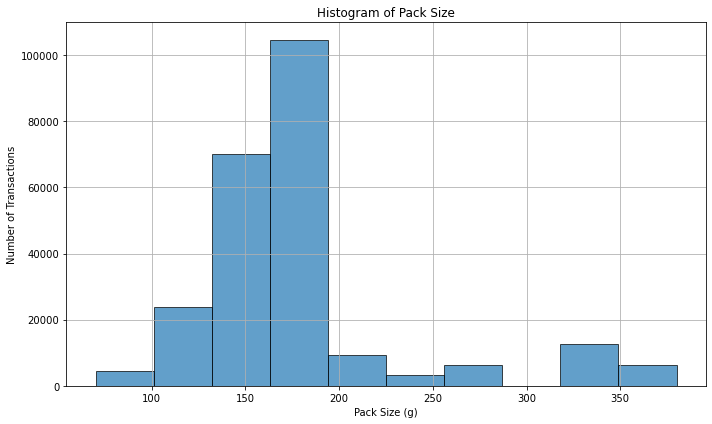

In [24]:
# Create a histogram of the 'PACK_SIZE' column
plt.figure(figsize=(10, 6))
plt.hist(df_trans['PACK_SIZE'], bins=10, edgecolor='k', alpha=0.7)
plt.xlabel('Pack Size (g)')
plt.ylabel('Number of Transactions')
plt.title('Histogram of Pack Size')
plt.grid(True)

# Show the histogram
plt.tight_layout()
plt.show()


In [25]:
# Extract brand name by taking the first word in 'PROD_NAME'
df_trans['BRAND'] = df_trans['PROD_NAME'].str.split().str[0]

# Check the unique brand names
unique_brands = df_trans['BRAND'].unique()

# Print the unique brand names
print("Unique Brands:")
unique_brands

Unique Brands:


array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

In [26]:
df_trans.shape

(246740, 10)

In [27]:
# Clean brand names - combine "Red" and "RRD" into one brand
df_trans['BRAND'].replace({'Red': 'RRD'}, inplace=True)

# Check the unique brand names after cleaning
unique_brands = df_trans['BRAND'].unique()

# Print the unique brand names
print("Unique Brands After Cleaning:")
print(unique_brands)


Unique Brands After Cleaning:
['Natural' 'CCs' 'Smiths' 'Kettle' 'Grain' 'Doritos' 'Twisties' 'WW'
 'Thins' 'Burger' 'NCC' 'Cheezels' 'Infzns' 'RRD' 'Pringles' 'Dorito'
 'Infuzions' 'Smith' 'GrnWves' 'Tyrrells' 'Cobs' 'French' 'Tostitos'
 'Cheetos' 'Woolworths' 'Snbts' 'Sunbites']


In [28]:
# Clean brand names - combine "snbts" and "Sunbites" into one brand
df_trans['BRAND'].replace({'Snbts': 'Sunbites','Smith':'Smiths', 'Dorito':'Doritos', 'Infzns':'Infuzions', 'GrnWves': "Sunbites"}, inplace=True)

# Check the unique brand names after cleaning
unique_brands = df_trans['BRAND'].unique()

# Print the unique brand names
print("Unique Brands After Cleaning:")
print(unique_brands)


Unique Brands After Cleaning:
['Natural' 'CCs' 'Smiths' 'Kettle' 'Grain' 'Doritos' 'Twisties' 'WW'
 'Thins' 'Burger' 'NCC' 'Cheezels' 'Infuzions' 'RRD' 'Pringles' 'Sunbites'
 'Tyrrells' 'Cobs' 'French' 'Tostitos' 'Cheetos' 'Woolworths']


In [29]:
# Load the customer data into
customer_df = pd.read_csv('QVI_purchase_behaviour.csv')
customer_df.shape

(72637, 3)

In [30]:
customer_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [31]:
# Basic summary of the customer dataset
print("Summary of Customer Data:")
print(customer_df.describe())

Summary of Customer Data:
       LYLTY_CARD_NBR
count    7.263700e+04
mean     1.361859e+05
std      8.989293e+04
min      1.000000e+03
25%      6.620200e+04
50%      1.340400e+05
75%      2.033750e+05
max      2.373711e+06


In [32]:
# Distributions of key columns in the customer dataset
print("Distribution of Customer Lifestage:")
print(customer_df['LIFESTAGE'].value_counts())

Distribution of Customer Lifestage:
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64


In [33]:
print("\nDistribution of Premium Customer:")
print(customer_df['PREMIUM_CUSTOMER'].value_counts())


Distribution of Premium Customer:
Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64


In [34]:
# Merge transaction data to customer data
merged_data = pd.merge(df_trans, customer_df, on='LYLTY_CARD_NBR', how='left')

# Print the merged data (this contains both transaction and customer information)
print("Merged Data:")
merged_data.head()

Merged Data:


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [93]:
merged_data.shape

(246740, 13)

In [35]:
# Check for null values
null_counts = merged_data.isnull().sum()
print("Null Value Counts:")
print(null_counts)

Null Value Counts:
DATE                   0
STORE_NBR              0
LYLTY_CARD_NBR         0
TXN_ID                 0
PROD_NBR               0
PROD_NAME              0
PROD_QTY               0
TOT_SALES              0
PACK_SIZE           6064
BRAND                  0
LIFESTAGE              0
PREMIUM_CUSTOMER       0
dtype: int64


In [36]:
# Define the file path where you want to save the CSV file
file_path = 'QVI_data.csv'

# Save the merged data as a CSV file
merged_data.to_csv(file_path, index=False)

print(f'Data saved as {file_path}')

Data saved as QVI_data.csv


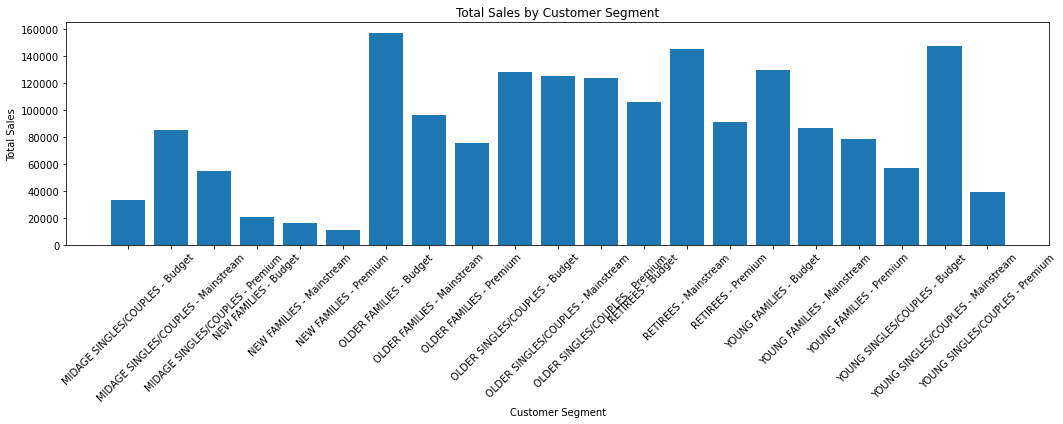

In [37]:
# Group by 'LIFESTAGE' and 'PREMIUM_CUSTOMER' to calculate total sales
total_sales = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Create a bar plot to visualize total sales by segments
plt.figure(figsize=(15, 6))
plt.bar(total_sales['LIFESTAGE'] + ' - ' + total_sales['PREMIUM_CUSTOMER'], total_sales['TOT_SALES'])
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.title('Total Sales by Customer Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [38]:
total_sales

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,33345.70
1,MIDAGE SINGLES/COUPLES,Mainstream,84734.25
2,MIDAGE SINGLES/COUPLES,Premium,54443.85
3,NEW FAMILIES,Budget,20607.45
4,NEW FAMILIES,Mainstream,15979.70
5,NEW FAMILIES,Premium,10760.80
6,OLDER FAMILIES,Budget,156863.75
7,OLDER FAMILIES,Mainstream,96413.55
8,OLDER FAMILIES,Premium,75242.60
9,OLDER SINGLES/COUPLES,Budget,127833.60


There are more Mainstream - young singles/couples and Mainstream - retirees who buy
chips. This contributes to there being more sales to these customer segments but
this is not a major driver for the Budget - Older families segment.

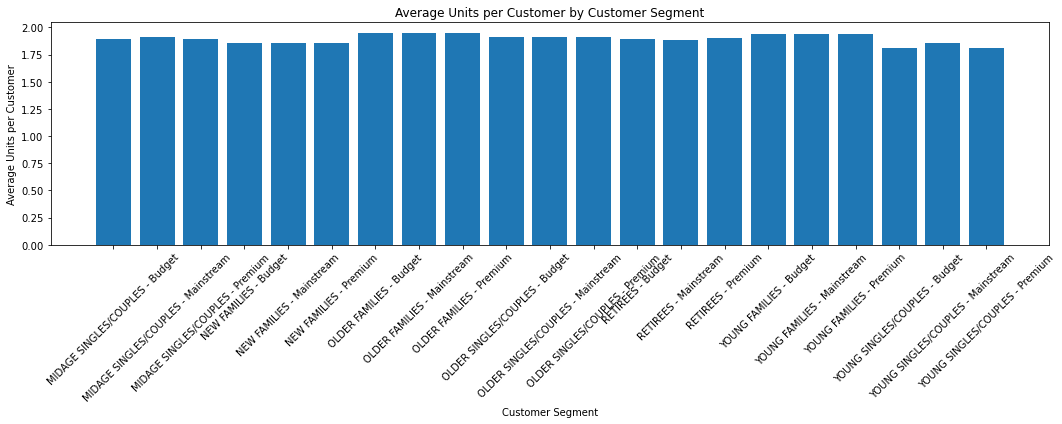

In [39]:
# Group by 'LIFESTAGE' and 'PREMIUM_CUSTOMER' to calculate average units per customer
average_units_per_customer = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index()

# Create a bar plot to visualize average units per customer by segments
plt.figure(figsize=(15, 6))
plt.bar(average_units_per_customer['LIFESTAGE'] + ' - ' + average_units_per_customer['PREMIUM_CUSTOMER'], average_units_per_customer['PROD_QTY'])
plt.xlabel('Customer Segment')
plt.ylabel('Average Units per Customer')
plt.title('Average Units per Customer by Customer Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [40]:
average_units_per_customer

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY
0,MIDAGE SINGLES/COUPLES,Budget,1.893626
1,MIDAGE SINGLES/COUPLES,Mainstream,1.911942
2,MIDAGE SINGLES/COUPLES,Premium,1.891750
3,NEW FAMILIES,Budget,1.855878
4,NEW FAMILIES,Mainstream,1.858124
5,NEW FAMILIES,Premium,1.860887
6,OLDER FAMILIES,Budget,1.945384
7,OLDER FAMILIES,Mainstream,1.948795
8,OLDER FAMILIES,Premium,1.945496
9,OLDER SINGLES/COUPLES,Budget,1.914920


Older families and young families in general buy more chips per customer

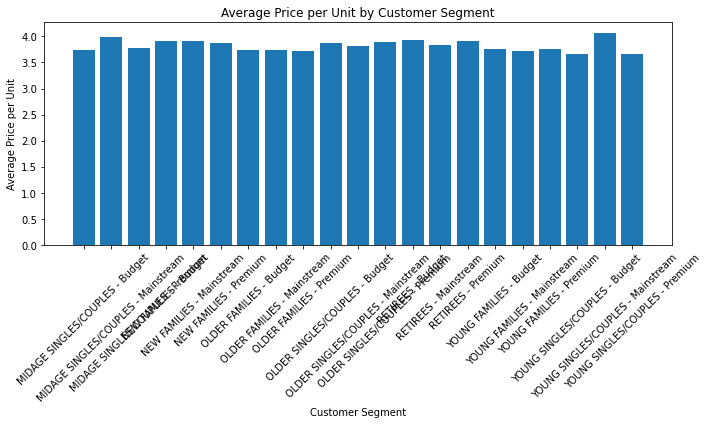

In [41]:
# Calculate average price per unit
merged_data['AVG_PRICE_PER_UNIT'] = merged_data['TOT_SALES'] / merged_data['PROD_QTY']

# Group by 'LIFESTAGE' and 'PREMIUM_CUSTOMER' to calculate average price per unit
average_price_per_unit = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['AVG_PRICE_PER_UNIT'].mean().reset_index()

# Create a bar plot to visualize average price per unit by segments
plt.figure(figsize=(10, 6))
plt.bar(average_price_per_unit['LIFESTAGE'] + ' - ' + average_price_per_unit['PREMIUM_CUSTOMER'], average_price_per_unit['AVG_PRICE_PER_UNIT'])
plt.xlabel('Customer Segment')
plt.ylabel('Average Price per Unit')
plt.title('Average Price per Unit by Customer Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
average_price_per_unit

,LIFESTAGE,PREMIUM_CUSTOMER,AVG_PRICE_PER_UNIT
0,MIDAGE SINGLES/COUPLES,Budget,3.743328
1,MIDAGE SINGLES/COUPLES,Mainstream,3.994241
2,MIDAGE SINGLES/COUPLES,Premium,3.770698
3,NEW FAMILIES,Budget,3.917688
4,NEW FAMILIES,Mainstream,3.916133
5,NEW FAMILIES,Premium,3.872110
6,OLDER FAMILIES,Budget,3.745340
7,OLDER FAMILIES,Mainstream,3.737077
8,OLDER FAMILIES,Premium,3.717000
9,OLDER SINGLES/COUPLES,Budget,3.882096


Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts.

## Statistical Analysis Using T-test

#### Perform an independent t-test between mainstream vs premium and budget midage singles and couples
and
#### young singles and couples
Perform a t-test to see if the difference is significant.

In [43]:
from scipy import stats

In [95]:
# Filter the data for the two LIFESTAGE categories and the two PREMIUM_CUSTOMER categories
segment1 = merged_data[(merged_data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])) & (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream')]
segment2 = merged_data[(merged_data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])) & (merged_data['PREMIUM_CUSTOMER'] == 'Premium')]

# Perform Welch's t-test
t_stat, p_value = stats.ttest_ind(segment1['AVG_PRICE_PER_UNIT'], segment2['AVG_PRICE_PER_UNIT'], equal_var=False)

# Print the t-test results
print(f"t-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Determine the significance level (e.g., 0.05)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("The unit price for Mainstream Young/Midage singles/couples and Premium Young/Midage singles/couples is significantly different.")
else:
    print("The unit price for Mainstream Young/Midage singles/couples and Premium Young/Midage singles/couples is not significantly different.")


t-statistic: 28.33801520481352
P-value: 8.840627735847042e-174
The unit price for Mainstream Young/Midage singles/couples and Premium Young/Midage singles/couples is significantly different.


The t-test results in a p-value of 8.8406, i.e. the unit price for mainstream, young and mid-age singles and couples is significantly higher than that of premium, young and midage singles and couples.

In [96]:
#find the segments for comparison (e.g., Mainstream vs. Budget, Mid-Age vs. Young)

segment1 = merged_data[(merged_data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])) & (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream')]
segment2 = merged_data[(merged_data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])) & (merged_data['PREMIUM_CUSTOMER'] == 'Budget')]

# Perform Welch's t-test
t_stat, p_value = stats.ttest_ind(segment1['AVG_PRICE_PER_UNIT'], segment2['AVG_PRICE_PER_UNIT'], equal_var=False)

# Print the t-test results
print(f"t-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Determine the significance level (e.g., 0.05)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("The unit price for Mainstream Young/Midage singles/couples and Premium Young/Midage singles/couples is significantly different.")
else:
    print("The unit price for Mainstream Young/Midage singles/couples and Premium Young/Midage singles/couples is not significantly different.")


t-statistic: 31.67100534967679
P-value: 1.3035100571688326e-215
The unit price for Mainstream Young/Midage singles/couples and Premium Young/Midage singles/couples is significantly different.


The t-test results in a p-value of 1.3035, i.e. the unit price for mainstream,
young and mid-age singles and couples is significantly higher than
that of budget, young and midage singles and couples.

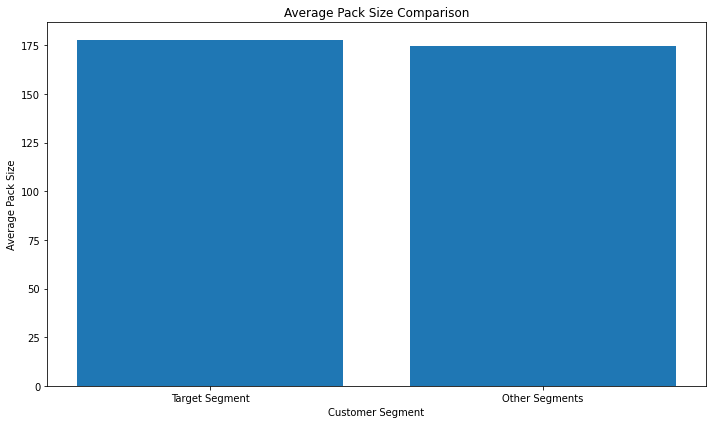

In [108]:
# Define the target LIFESTAGE values
target_lifestage_values = ['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']

# Filter the data for the target segment
target_segment = merged_data[(merged_data['LIFESTAGE'].isin(target_lifestage_values)) & (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream')]

# Filter the data for other segments
other_segments = merged_data[~(merged_data['LIFESTAGE'].isin(target_lifestage_values)) & (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream')]

# Calculate the average pack size for the target segment and other segments
target_mean_pack_size = target_segment['PACK_SIZE'].mean()
other_mean_pack_size = other_segments['PACK_SIZE'].mean()

# Create a bar plot to compare pack sizes for the target segment vs. others
plt.figure(figsize=(10, 6))
plt.bar(['Target Segment', 'Other Segments'], [target_mean_pack_size, other_mean_pack_size])
plt.xlabel('Customer Segment')
plt.ylabel('Average Pack Size')
plt.title('Average Pack Size Comparison')
plt.tight_layout()
plt.show()


We can see that our target segment tends to buy larger packs of chips.


## Favorite Brand of target customers Using Affinity Analysis

In [133]:
target_segment.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,AVG_PRICE_PER_UNIT
4692,2019-05-18,3,3159,1759,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8,170.0,Doritos,MIDAGE SINGLES/COUPLES,Mainstream,4.4
4693,2019-05-16,3,3294,2370,51,Doritos Mexicana 170g,2,8.8,170.0,Doritos,MIDAGE SINGLES/COUPLES,Mainstream,4.4
4694,2018-08-18,4,4187,3492,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175.0,Kettle,MIDAGE SINGLES/COUPLES,Mainstream,5.4
4695,2019-05-19,4,4264,3841,47,Doritos Corn Chips Original 170g,2,8.8,170.0,Doritos,MIDAGE SINGLES/COUPLES,Mainstream,4.4
4696,2018-08-19,7,7036,6447,114,Kettle Sensations Siracha Lime 150g,1,4.6,150.0,Kettle,MIDAGE SINGLES/COUPLES,Mainstream,4.6


In [174]:
#grouping dataset to form a list of products bought by same customer lifestage on same date
target_df=target_segment.groupby(['TXN_ID','DATE'])['BRAND'].apply(lambda x: list(x))
target_df

TXN_ID   DATE      
2        2018-09-16         [RRD]
6        2018-12-28     [Cheetos]
10       2018-09-09     [Doritos]
22       2018-09-03      [Kettle]
23       2018-11-28         [RRD]
                          ...    
270200   2018-07-27      [Kettle]
270201   2018-11-10    [Pringles]
270202   2019-04-01    [Pringles]
270205   2018-12-07      [Kettle]
2415841  2018-12-20      [Kettle]
Name: BRAND, Length: 30516, dtype: object

In [175]:
transactions = target_df.values.tolist()
transactions[:10]

[['RRD'],
 ['Cheetos'],
 ['Doritos'],
 ['Kettle'],
 ['RRD'],
 ['Infuzions'],
 ['Smiths'],
 ['Smiths'],
 ['Sunbites'],
 ['Doritos']]

In [176]:
import mlxtend.frequent_patterns 
import mlxtend.preprocessing

encode_=mlxtend.preprocessing.TransactionEncoder()
encode_arr=encode_.fit_transform(transactions)

print(encode_arr)

[[False False False ... False False False]
 [False False  True ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [177]:
encode_df=pd.DataFrame(encode_arr, columns=encode_.columns_)
encode_df

,Burger,CCs,Cheetos,Cheezels,Cobs,Doritos,French,Grain,Infuzions,Kettle,...,Pringles,RRD,Smiths,Sunbites,Thins,Tostitos,Twisties,Tyrrells,WW,Woolworths
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30511,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
30512,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
30513,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
30514,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [178]:
md=mlxtend.frequent_patterns.apriori(encode_df)
md_minsup=mlxtend.frequent_patterns.apriori(encode_df,
                                           min_support=0.00030, 
                                            use_colnames=True)
md_minsup.head(20)

,support,itemsets
0,0.003605,(Burger)
1,0.012485,(CCs)
2,0.009208,(Cheetos)
3,0.018580,(Cheezels)
4,0.044534,(Cobs)
5,0.117578,(Doritos)
6,0.003965,(French)
7,0.028936,(Grain)
8,0.063180,(Infuzions)
9,0.195864,(Kettle)


In [187]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Select data for the Mainstream - young singles/couples segment & Mainstream - midage singles/couples
target_lifestage_values = ['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']
target_segment = merged_data[(merged_data['LIFESTAGE'].isin(target_lifestage_values)) & (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream')]
# Create a dataset with brand columns (1-hot encoding)
brand_columns = pd.get_dummies(target_segment['BRAND'], prefix='', prefix_sep='')

# Concatenate the one-hot encoded columns with the original dataframe
df_encoded = pd.concat([target_segment['TXN_ID'], brand_columns], axis=1)
df_encoded = df_encoded.astype(bool)

# Use Apriori to find frequent itemsets with a minimum support threshold
frequent_itemsets = apriori(df_encoded.drop(columns=['TXN_ID']), min_support=0.00030, use_colnames=True)

print(frequent_itemsets)

     support      itemsets
0   0.003590      (Burger)
1   0.012435         (CCs)
2   0.009171     (Cheetos)
3   0.018506    (Cheezels)
4   0.044355        (Cobs)
5   0.117138     (Doritos)
6   0.003949      (French)
7   0.028819       (Grain)
8   0.062959   (Infuzions)
9   0.195176      (Kettle)
10  0.004276         (NCC)
11  0.017429     (Natural)
12  0.113385    (Pringles)
13  0.048500         (RRD)
14  0.104344      (Smiths)
15  0.010281    (Sunbites)
16  0.058781       (Thins)
17  0.044682    (Tostitos)
18  0.045367    (Twisties)
19  0.029929    (Tyrrells)
20  0.023532          (WW)
21  0.003394  (Woolworths)


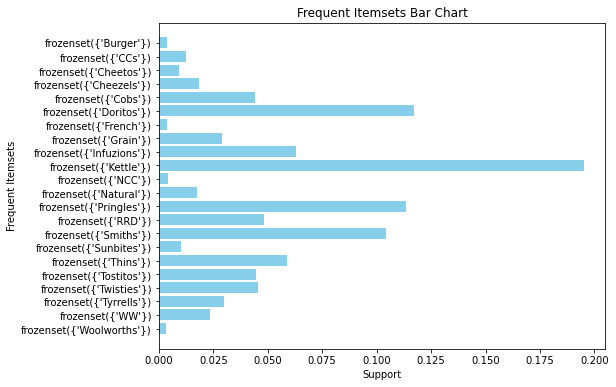

In [188]:
# Create a bar chart of frequent itemsets
plt.figure(figsize=(8, 6))
plt.barh(frequent_itemsets['itemsets'].astype(str), frequent_itemsets['support'], color='skyblue')
plt.xlabel('Support')
plt.ylabel('Frequent Itemsets')
plt.title('Frequent Itemsets Bar Chart')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()

In [191]:
# Calculate the quantity by pack for target_segment
quantity_segment1_by_pack = target_segment.groupby('PACK_SIZE')['PROD_QTY'].sum() / target_segment['PROD_QTY'].sum()
quantity_segment1_by_pack = quantity_segment1_by_pack.reset_index()
quantity_segment1_by_pack.columns = ['PACK_SIZE', 'target_segment']

# Calculate the quantity by pack for other_segments
quantity_other_by_pack = other_segments.groupby('PACK_SIZE')['PROD_QTY'].sum() / other_segments['PROD_QTY'].sum()
quantity_other_by_pack = quantity_other_by_pack.reset_index()
quantity_other_by_pack.columns = ['PACK_SIZE', 'other_segments']

# Merge the two DataFrames
pack_proportions = pd.merge(quantity_segment1_by_pack, quantity_other_by_pack, on='PACK_SIZE')

# Calculate affinity to pack
pack_proportions['affinityToPack'] = pack_proportions['target_segment'] / pack_proportions['other_segments']

# Sort by affinity in descending order
pack_proportions = pack_proportions.sort_values(by='affinityToPack', ascending=False)

# Display the result
print(pack_proportions)


    PACK_SIZE  target_segment  other_segments  affinityToPack
17      270.0        0.031425        0.024639        1.275435
18      330.0        0.060709        0.048191        1.259751
19      380.0        0.030781        0.025368        1.213356
2       110.0        0.104722        0.089548        1.169450
14      210.0        0.015060        0.012972        1.160935
4       134.0        0.113792        0.099925        1.138772
16      250.0        0.013928        0.012664        1.099818
5       135.0        0.014677        0.013377        1.097123
10      175.0        0.255754        0.260138        0.983146
9       170.0        0.080260        0.082551        0.972253
6       150.0        0.154044        0.158892        0.969494
8       165.0        0.056182        0.063871        0.879619
12      190.0        0.008531        0.013013        0.655591
11      180.0        0.003830        0.006129        0.624903
7       160.0        0.007382        0.012137        0.608213
0       

We can see that the preferred PACK_SIZE is 270g.